In [21]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [22]:
def prepare_dl_data(data_path, target_size=(224, 224)):
    """
    Reads all .jpg files in data_path, resizes them,
    normalizes pixels to [0,1], and assigns labels:
    cat -> 0, dog -> 1 (based on filename prefix).
    """
    filenames = [f for f in os.listdir(data_path) if f.lower().endswith('.jpg')]
    X, y = [], []

    for filename in filenames:
        img_path = os.path.join(data_path, filename)

        img = Image.open(img_path).convert('RGB').resize(target_size)
        img_array = np.array(img).astype(np.float32) / 255.0

        prefix = filename.split('.')[0]
        if prefix == 'cat':
            label = 0
        elif prefix == 'dog':
            label = 1
        else:
            raise ValueError(f"Filename {filename} does not start with 'cat' or 'dog'")

        X.append(img_array)
        y.append(label)

    X = np.stack(X)
    y = np.array(y)
    return X, y

In [23]:
# ---------------------------------------------------
# 2. Find the correct path to data_sample
# ---------------------------------------------------

import ipynbname

notebook_path = ipynbname.path()
print("Notebook path:", notebook_path)

import os
BASE_DIR = os.path.dirname(notebook_path)

# Folder where this .py file lives
# BASE_DIR = os.path.dirname(os.path.abspath(__file__))

# Try: data_sample in same folder as script
cand1 = os.path.join(BASE_DIR, "data_sample")
# Try: data_sample one level above (this matches your structure: module-4-vignette/data_sample)
cand2 = os.path.join(BASE_DIR, "..", "data_sample")

if os.path.isdir(cand1):
    data_dir = cand1
elif os.path.isdir(cand2):
    data_dir = os.path.abspath(cand2)
else:
    raise FileNotFoundError(
        f"Could not find 'data_sample' folder.\n"
        f"Tried:\n  {cand1}\n  {cand2}\n"
        f"Please change data_dir to the correct path."
    )

print("Using data from:", data_dir)

X, y = prepare_dl_data(data_dir, target_size=(224, 224))
print("All data shape:", X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Notebook path: /Users/fangchengcheng/Desktop/pstat197a/module-4-vignette/notebooks/1.ipynb
Using data from: /Users/fangchengcheng/Desktop/pstat197a/module-4-vignette/data_sample
All data shape: (20, 224, 224, 3) (20,)
Train shape: (16, 224, 224, 3) (16,)
Test shape: (4, 224, 224, 3) (4,)


In [24]:
# ---------------------------------------------------
# 3. Build a CNN model
# ---------------------------------------------------

input_shape = (224, 224, 3)

model = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,233,985 (50.48 MB)

 Trainable params: 13,233,985 (50.48 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# ---------------------------------------------------
# 4. Train
# ---------------------------------------------------

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train.astype(np.float32),
    epochs=20,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.4167 - loss: 0.7809 - val_accuracy: 0.2500 - val_loss: 0.6985
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8333 - loss: 0.6444 - val_accuracy: 0.2500 - val_loss: 0.8298
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5833 - loss: 0.6683 - val_accuracy: 0.2500 - val_loss: 0.8747
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5833 - loss: 0.6687 - val_accuracy: 0.2500 - val_loss: 0.9161


In [26]:
# ---------------------------------------------------
# 5. Evaluate
# ---------------------------------------------------

test_loss, test_acc = model.evaluate(X_test, y_test.astype(np.float32), verbose=0)
print(f"\nTest loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc * 100:.2f}%")


Test loss: 0.6945
Test accuracy: 50.00%


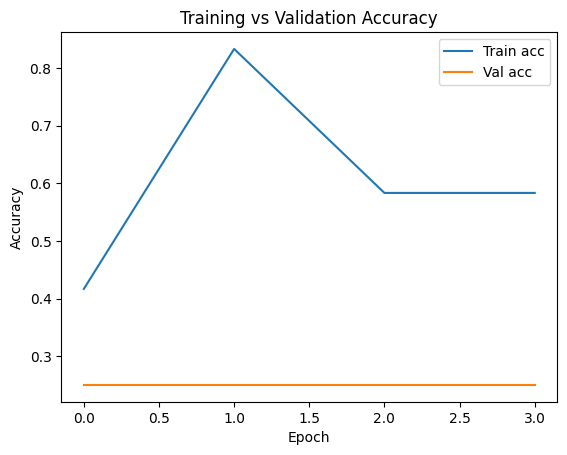

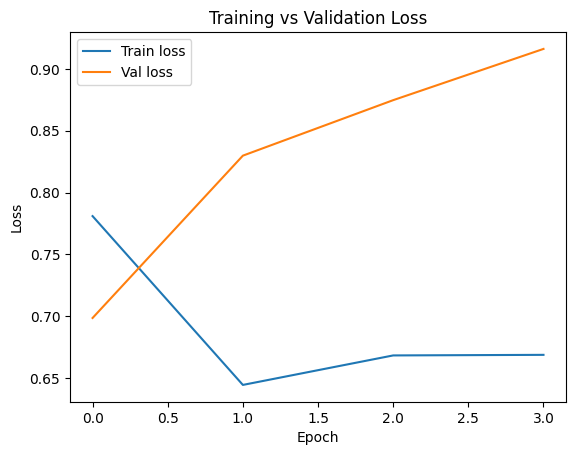

In [27]:
# ---------------------------------------------------
# 6. Plot curves (optional)
# ---------------------------------------------------

plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [28]:
# ---------------------------------------------------
# 7. Show a few predictions (optional)
# ---------------------------------------------------

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() >= 0.5).astype(int)

for i in range(min(5, len(X_test))):
    true_label = "cat" if y_test[i] == 0 else "dog"
    pred_label = "cat" if y_pred[i] == 0 else "dog"
    print(f"Example {i}: true = {true_label}, predicted = {pred_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Example 0: true = cat, predicted = dog
Example 1: true = cat, predicted = dog
Example 2: true = dog, predicted = dog
Example 3: true = dog, predicted = dog
